In [0]:
!wget https://www.dropbox.com/sh/9pt90m8eqk50gw5/AAAF316c8kyLd5kRNpswdG7Ya?dl=0

--2019-09-07 07:59:30--  https://www.dropbox.com/sh/9pt90m8eqk50gw5/AAAF316c8kyLd5kRNpswdG7Ya?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/9pt90m8eqk50gw5/AAAF316c8kyLd5kRNpswdG7Ya [following]
--2019-09-07 07:59:31--  https://www.dropbox.com/sh/raw/9pt90m8eqk50gw5/AAAF316c8kyLd5kRNpswdG7Ya
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc374aca65832d6878008adc9029.dl.dropboxusercontent.com/zip_by_token_key?key=AoGMoxYRWi4h3a4HGHV25NtyGpJ4oUEuqx5jdjAQaAdKDM3Vje8GFrtKox5uast8MKDkcKGDZwPEAEXs-GLuFnAtTyQ9oM-8f-MC6iIzeStOweqk4MdTSmBlWifs9rG8USFHSKJWyJb5pFelem5iSPdrj20YeLN9dvd1N61aE2OdHAe6rGuyzGKrpf51v3bbgzX9vcAv0zuRcUfiSb9YUgau [following]
--2019-09-07 07:59:31--  https://uc374aca65832d6878008adc9029.dl.dropboxuser

In [0]:
!unzip AAAF316c8kyLd5kRNpswdG7Ya?dl=0.5

Archive:  AAAF316c8kyLd5kRNpswdG7Ya?dl=0.5
mapname:  conversion of  failed
replace cartoonset10k.tgz? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
 extracting: images/cats/cat.1.jpg   
 extracting: images/cats/cat.8.jpg   
 extracting: images/dogs/dog.70.jpg  
 extracting: images/dogs/dog.54.jpg  
 extracting: images/cats/cat.52.jpg  
 extracting: images/cats/cat.94.jpg  
 extracting: images/dogs/dog.92.jpg  
 extracting: images/cats/cat.93.jpg  
 extracting: images/cats/cat.21.jpg  
 extracting: images/dogs/dog.24.jpg  
 extracting: images/cats/cat.61.jpg  
 extracting: images/cats/cat.37.jpg  
 extracting: images/dogs/dog.75.jpg  
 extracting: images/dogs/dog.64.jpg  
 extracting: images/cats/cat.99.jpg  
 extracting: images/dogs/dog.91.jpg  
 extracting: images/cats/cat.25.jpg  
 extracting: images/dogs/dog.34.jpg  
 extracting: images/dogs/dog.17.jpg  
 extracting: images/cats/cat.91.jpg  
 extracting: images/dogs/dog.27.jpg  
 extracting: images/dogs/dog.96.jpg  
 extracting: images/do

In [0]:
!ls
import os
print(os.listdir('images'))
import shutil

'AAAF316c8kyLd5kRNpswdG7Ya?dl=0'     cartoonset10k.tgz
'AAAF316c8kyLd5kRNpswdG7Ya?dl=0.1'   images
'AAAF316c8kyLd5kRNpswdG7Ya?dl=0.2'   sample_data
'AAAF316c8kyLd5kRNpswdG7Ya?dl=0.3'   val1_images
'AAAF316c8kyLd5kRNpswdG7Ya?dl=0.4'   val2_images
'AAAF316c8kyLd5kRNpswdG7Ya?dl=0.5'   val_images
['horses', 'Humans', 'dogs', 'cats']


In [0]:
#now moving some images from training images to validation images
if not os.path.isdir("val3_images"):
  os.mkdir("val3_images")
classes=['cats','dogs','Humans','horses']
for c in classes:
  p=os.path.join("val3_images",c)
  os.mkdir(p)
split1=0.9

In [0]:
#dont rull this cell again
for f in os.listdir("images"):
  path="images/"+f
  imgs=os.listdir(path)
  split_size=int(split1*len(imgs))
  imgs_to_move=imgs[split_size:]
  print(len(imgs_to_move))
  for imgs_f in imgs_to_move:
    src=os.path.join(path,imgs_f)
    #print(src)
    dest=os.path.join("val3_images/"+f,imgs_f)
    shutil.move(src,dest)
    #print(dest)

21
21
21
21


In [0]:
print("Training Data")
for f in os.listdir('images'):
  path='images/'+f
  print(f+ " "+str(len(os.listdir(path))))

Training Data
horses 181
Humans 181
dogs 181
cats 181


In [0]:
print("validataion data")
for f in os.listdir('images'):
  path='val3_images/'+f
  print(f+" "+str(len(os.listdir(path))))

validataion data
horses 21
Humans 21
dogs 21
cats 21


In [0]:
from keras.layers import *
from keras.models import Sequential

In [0]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))          
model.add(Dense(4,activation='softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [0]:
from keras.optimizers import Adam
adam=Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])


In [0]:
import os
from keras.preprocessing import image
from pathlib import Path
import matplotlib.pyplot as plt

In [0]:
folders=os.listdir('images')
print(folders)
images=[]

['horses', 'Humans', 'dogs', 'cats']


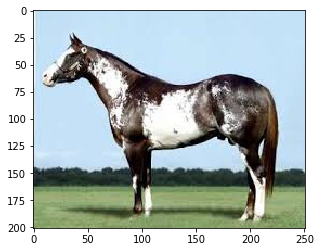

In [0]:
P="images/horses/horse-67.jpg"
img=image.load_img(P)
img1=image.img_to_array(img)/255.0
plt.imshow(img1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
  

In [0]:
train_gen=ImageDataGenerator(rescale=1.0/255)
val_gen=ImageDataGenerator(rescale=1.0/255)

In [0]:
train_generator=train_gen.flow_from_directory("images/",target_size=(150,150),batch_size=32,class_mode='categorical')
val_generator=val_gen.flow_from_directory("val3_images/",target_size=(150,150),class_mode='categorical')

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [0]:
x,y=train_generator.next()

In [0]:
history=model.fit_generator(train_generator,epochs=20,steps_per_epoch=7,validation_data=val_generator,validation_steps=4)

Epoch 1/20
7/7 [==============================] - 1s 131ms/step - loss: 0.5097 - acc: 0.8259 - val_loss: 0.7983 - val_acc: 0.6983
Epoch 2/20
7/7 [==============================] - 1s 103ms/step - loss: 0.5286 - acc: 0.7729 - val_loss: 0.7129 - val_acc: 0.7069
Epoch 3/20
7/7 [==============================] - 1s 96ms/step - loss: 0.5569 - acc: 0.7857 - val_loss: 0.8472 - val_acc: 0.6442
Epoch 4/20
7/7 [==============================] - 1s 102ms/step - loss: 0.4833 - acc: 0.8423 - val_loss: 0.8594 - val_acc: 0.6552
Epoch 5/20
7/7 [==============================] - 1s 102ms/step - loss: 0.4521 - acc: 0.8259 - val_loss: 0.7390 - val_acc: 0.6983
Epoch 6/20
7/7 [==============================] - 1s 109ms/step - loss: 0.5294 - acc: 0.7902 - val_loss: 0.8994 - val_acc: 0.6346
Epoch 7/20
7/7 [==============================] - 1s 90ms/step - loss: 0.5702 - acc: 0.7679 - val_loss: 0.8777 - val_acc: 0.6293
Epoch 8/20
7/7 [==============================] - 1s 101ms/step - loss: 0.5216 - acc: 0.7902

In [0]:
accuracy=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

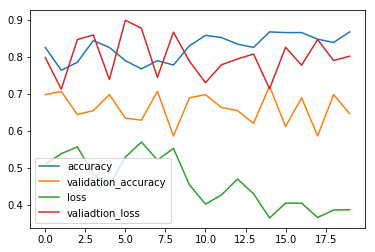

In [0]:
plt.plot(accuracy,label='accuracy')
plt.plot(val_acc,label='validation_accuracy')
plt.plot(loss,label='loss')
plt.plot(val_loss,label='valiadtion_loss')
plt.legend()
plt.show()